<a href="https://colab.research.google.com/github/Silva-TI/MachineLearning-Silva/blob/main/Latihan_Mandiri_3_Regresi_dan_Evaluasi_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/Nurulfikri/Laptop/SEM 3/Machine Learning/Praktikum ml/Praktikum 3"

In [3]:
import pandas as pd

df = pd.read_csv(path + '/Data/archive/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
df1 = (df[["season", "yr", "mnth", "weekday", "temp", "cnt"]]
       .rename(columns={"season":"musim", "yr":"tahun",
                        "mnth": "bulan", "weekday": "hari_kerja",
                        "temp": "suhu_norm", "cnt": "total_sewa"})
       .copy()
       )
df1.head()

,musim,tahun,bulan,hari_kerja,suhu_norm,total_sewa
0,1,0,1,6,0.344167,985
1,1,0,1,0,0.363478,801
2,1,0,1,1,0.196364,1349
3,1,0,1,2,0.200000,1562
4,1,0,1,3,0.226957,1600


In [7]:
#Matriks korelasi
corr_matrix = df1.corr()
print(corr_matrix)

               musim     tahun     bulan  hari_kerja  suhu_norm  total_sewa
musim       1.000000 -0.001844  0.831440   -0.003080   0.334315    0.406100
tahun      -0.001844  1.000000 -0.001792   -0.005461   0.047604    0.566710
bulan       0.831440 -0.001792  1.000000    0.009509   0.220205    0.279977
hari_kerja -0.003080 -0.005461  0.009509    1.000000  -0.000170    0.067443
suhu_norm   0.334315  0.047604  0.220205   -0.000170   1.000000    0.627494
total_sewa  0.406100  0.566710  0.279977    0.067443   0.627494    1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

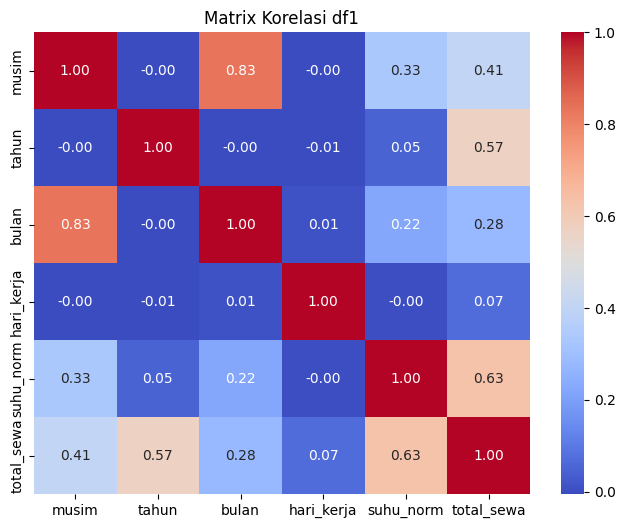

In [8]:
#Head Grafik
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrix Korelasi df1")
plt.show

In [10]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan, # Variabel dependen
y = df1["total_sewa"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df1[["tahun", "suhu_norm"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # random_state supaya hasil konsisten
)

# Cetak Pembagian Data
print("Jumlah data train :", len(X_train))
print("Jumlah data test :", len(X_test))

# Cek apakah sudah ada constanta pada data training
X_train.head()

Jumlah data train : 584
Jumlah data test : 147


,tahun,suhu_norm
682,1,0.343333
250,0,0.633913
336,0,0.299167
260,0,0.507500
543,1,0.697500


In [11]:
#tambah konstanta
import statsmodels.api as sm
x_train_const = sm.add_constant(X_train)
x_train_const.head()

,const,tahun,suhu_norm
682,1.0,1,0.343333
250,1.0,0,0.633913
336,1.0,0,0.299167
260,1.0,0,0.507500
543,1.0,1,0.697500


In [15]:
import statsmodels.api as sm
#buat model OLS
model = sm.OLS(y_train, x_train_const).fit()
print('----------------------------')
print(model.params)
print('----------------------------')
const = model.params['const']
x1_tahun = model.params['tahun']
x2_suhu = model.params['suhu_norm']

print(f"y = {const:.3f} + {x1_tahun:.3f}*x1 + {x2_suhu:.3f} *x2")

----------------------------
const         291.742820
tahun        2044.824151
suhu_norm    6421.422545
dtype: float64
----------------------------
y = 291.743 + 2044.824*x1 + 6421.423 *x2


In [16]:
#Tampilkan Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             total_sewa   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     597.1
Date:                Thu, 09 Oct 2025   Prob (F-statistic):          1.21e-141
Time:                        04:42:35   Log-Likelihood:                -4916.0
No. Observations:                 584   AIC:                             9838.
Df Residuals:                     581   BIC:                             9851.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        291.7428    140.237      2.080      0.0

In [19]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "tahun": X_test["tahun"].to_numpy(),
    "suhu_norm": X_test["suhu_norm"].to_numpy(),
    "total_sewa_aktual": y_test.to_numpy(),
    "total_sewa_prediksi": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error"] = hasil["total_sewa_prediksi"] - hasil["total_sewa_aktual"]

# 2) Akurasi per-baris (100 * (1 - |error/aktual|), dibatasi 0-100
import numpy as np
denom = hasil["total_sewa_aktual"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = ((1 - (hasil["Selisih error"].abs() / denom)).clip(lower=0, upper=1)) * 100

hasil

,tahun,suhu_norm,total_sewa_aktual,total_sewa_prediksi,Selisih error,Akurasi (%)
703,1,0.475833,6606,5392.091725,-1213.908275,81.624156
33,0,0.186957,1550,1492.272715,-57.727285,96.275659
300,0,0.330833,3747,2416.161305,-1330.838695,64.482554
456,1,0.425833,6041,5071.020598,-969.979402,83.943397
633,1,0.550000,7538,5868.349371,-1669.650629,77.850217
...,...,...,...,...,...,...
70,0,0.329167,2132,2405.463215,273.463215,87.173395
192,0,0.794167,4258,5391.424698,1133.424698,73.381289
328,0,0.375000,2792,2699.776274,-92.223726,96.696858
165,0,0.626667,5180,4315.836422,-864.163578,83.317305
